In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
# !kaggle datasets download -d salader/dogs-vs-cats
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:11<00:00, 111MB/s]
100% 1.06G/1.06G [00:11<00:00, 97.3MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [ ]:
#generator
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalise

def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [ ]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1,activation='sigmoid'))


In [ ]:

# model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 64s 101ms/step - loss: 0.7751 - accuracy: 0.5814 - val_loss: 0.6317 - val_accuracy: 0.5934
Epoch 2/10
625/625 [==============================] - 63s 100ms/step - loss: 0.6519 - accuracy: 0.5920 - val_loss: 0.5958 - val_accuracy: 0.6602
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.6005 - accuracy: 0.6503 - val_loss: 0.5534 - val_accuracy: 0.6862
Epoch 4/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5502 - accuracy: 0.6931 - val_loss: 0.4710 - val_accuracy: 0.7832
Epoch 5/10
625/625 [==============================] - 63s 101ms/step - loss: 0.4853 - accuracy: 0.7516 - val_loss: 0.4627 - val_accuracy: 0.7770
Epoch 6/10
625/625 [==============================] - 63s 101ms/step - loss: 0.4305 - accuracy: 0.7875 - val_loss: 0.5038 - val_accuracy: 0.7462
Epoch 7/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3914 - accuracy: 0.8137 - val_loss: 0.4752 - val_ac

In [ ]:
import matplotlib.pyplot as plt

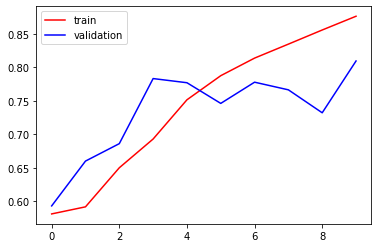

In [ ]:
# model=Sequential()

# model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))


# model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))


# model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

# model.add(Flatten())

# model.add(Dense(128,activation='relu'))
# model.add(Dropout(.2))
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(.2))
# model.add(Dense(1,activation='sigmoid'))

# USNG   above code

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


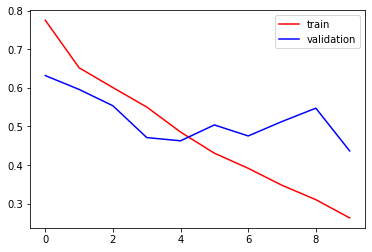

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

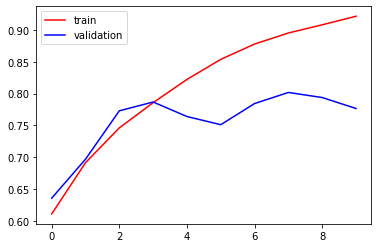

In [ ]:
# USNG   BATCH BatchNormalization and dropout
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


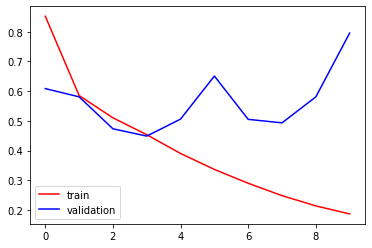

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

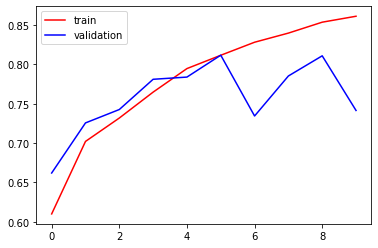

In [ ]:
# USNG  REGULARISATION BATCH BatchNormalization and dropout
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


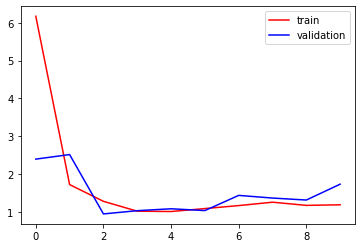

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

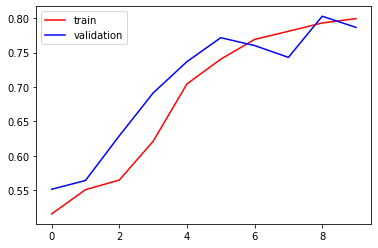

In [ ]:
#USNG ONLY REGULARISATION
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

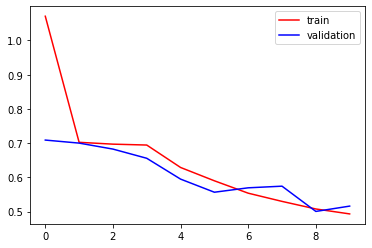

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# 
# 

In [ ]:
import cv2


In [ ]:
t1=cv2.imread('/content/download (2).jpg')
t2=cv2.imread('/content/download (3).jpg')
t3=cv2.imread('/content/images (1).jpg')

In [ ]:
t1=cv2.resize(t1,(256,256))
t2=cv2.resize(t2,(256,256))
t3=cv2.resize(t3,(256,256))


In [ ]:
t_in1=t1.reshape((1,256,256,3))
t_in2=t2.reshape((1,256,256,3))
t_in3=t3.reshape((1,256,256,3))


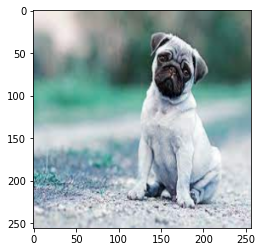

In [ ]:
plt.imshow(t2)

In [ ]:
model.predict(t_in2)

array([[0.41004664]], dtype=float32)